In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

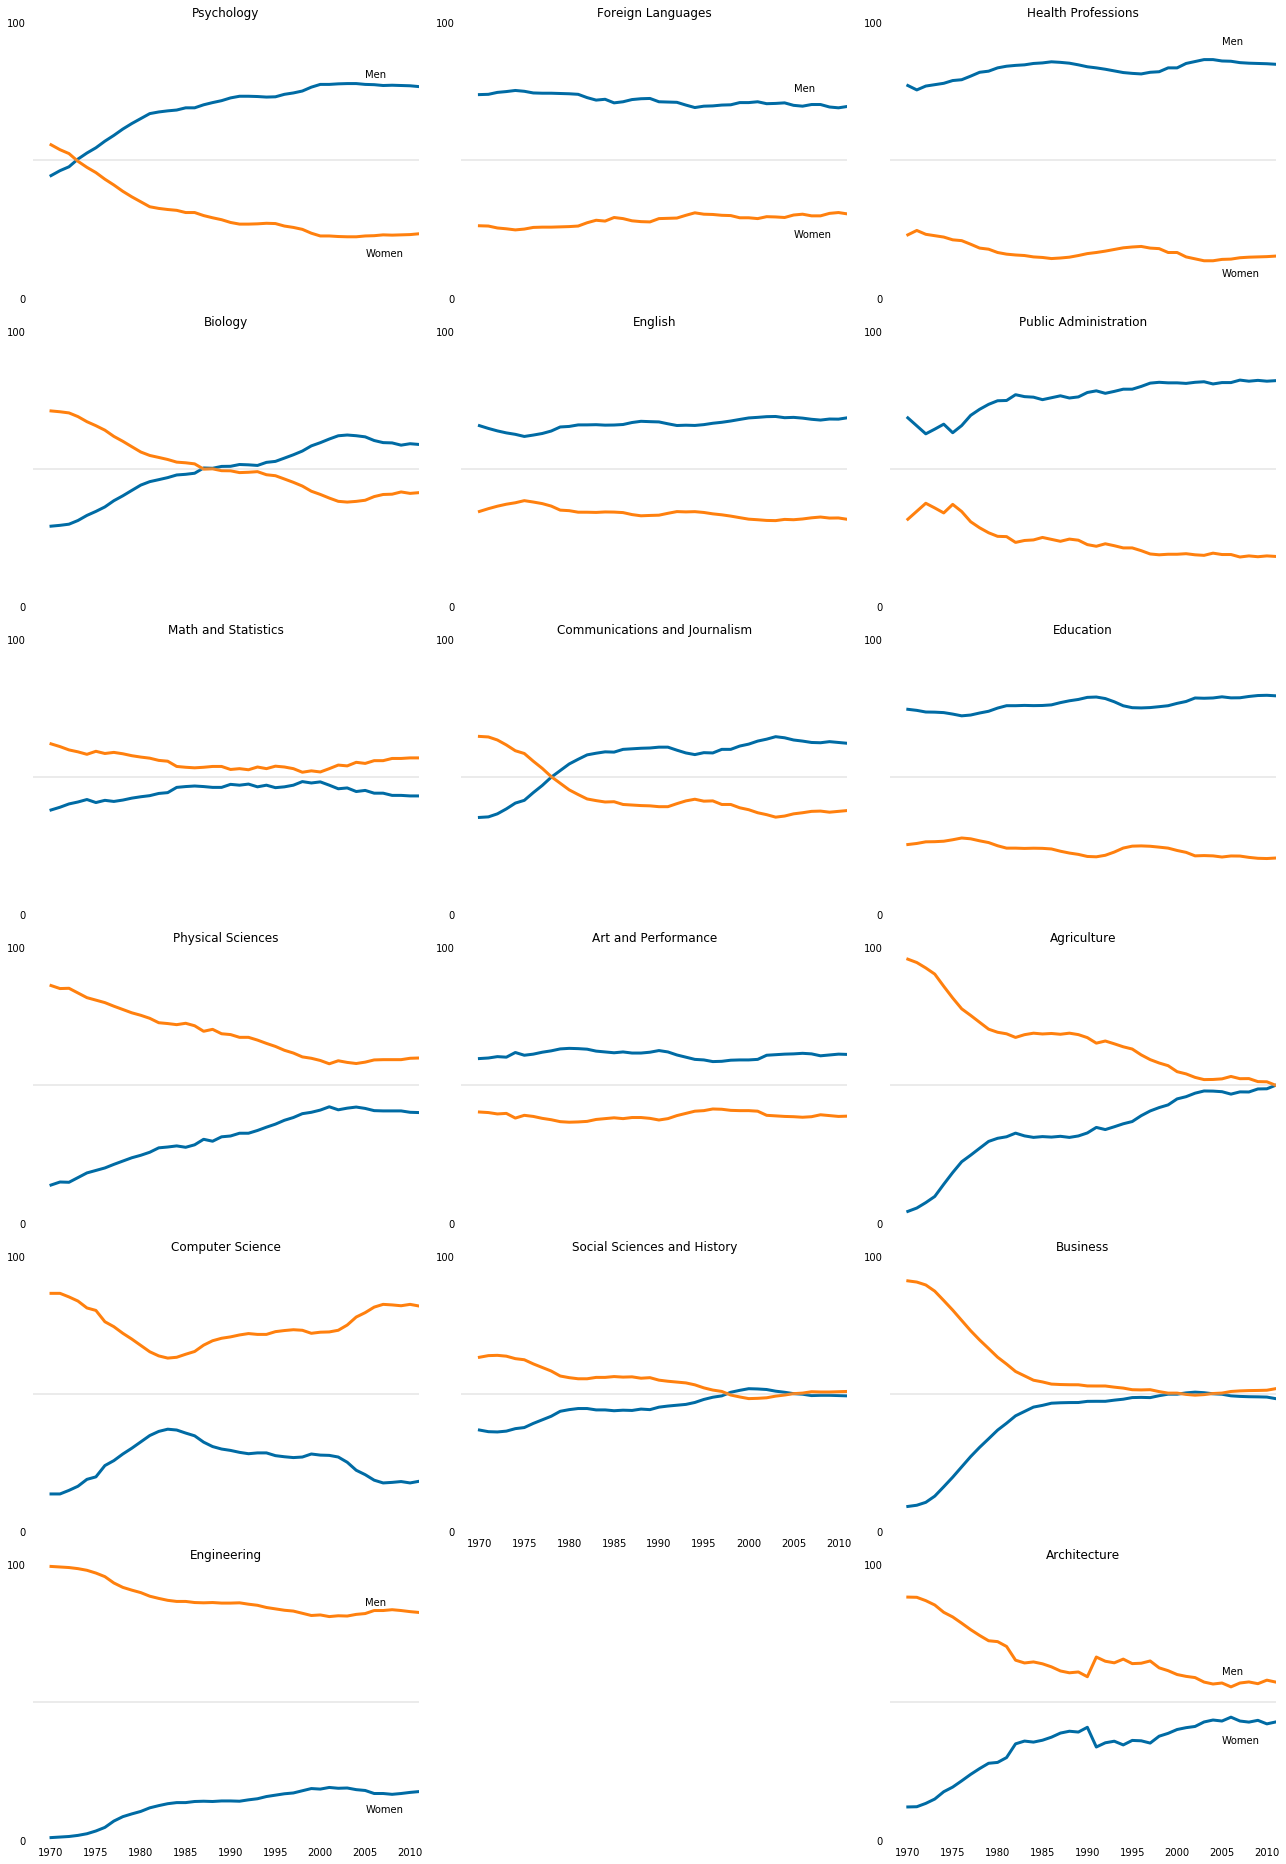

In [18]:
# Colors for later use
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)
light_grey = (171/255, 171/255, 171/255)

# Each of this list will be column on the plot
stem_cats = ['Psychology', 'Biology', 'Math and Statistics',
             'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism',
                 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration',
              'Education', 'Agriculture', 'Business', 'Architecture']

major_cats = [stem_cats, lib_arts_cats, other_cats]
locs = ["right", "left", "top", "bottom"]

fig = plt.figure(figsize=(18, 26))
for mjr_idx, major_cat in enumerate(major_cats):
    for sp, category in enumerate(major_cat):
        subplot_index = 3*sp + (mjr_idx + 1)
        ax = fig.add_subplot(6, 3, subplot_index)
        ax.plot(women_degrees['Year'], women_degrees[category],
                c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[category],
                c=cb_orange, label='Men', linewidth=3)
        # Remove spines
        for loc in locs:
            ax.spines[loc].set_visible(False)
        # Set axis limits
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0, 100)
        ax.set_title(category)
        # Don't display ticks
        ax.tick_params(**{loc: False for loc in locs})
        # Except these
        ax.set_yticks([0, 100])
        # Middle horizontal line
        ax.axhline(50, c=light_grey, alpha=0.3)
        # Text annotations Men/Women instead of ugly legend
        # not the smartest way though
        if subplot_index == 1:
            ax.text(2005, 80, 'Men')
            ax.text(2005, 15, 'Women')
        elif subplot_index == 16:
            ax.text(2005, 85, 'Men')
            ax.text(2005, 10, 'Women')
        elif subplot_index == 2:
            ax.text(2005, 75, 'Men')
            ax.text(2005, 22, 'Women')
        elif subplot_index == 3:
            ax.text(2005, 92, 'Men')
            ax.text(2005, 8, 'Women')
        elif subplot_index == 18:
            ax.text(2005, 60, 'Men')
            ax.text(2005, 35, 'Women')
        # leave xticks just at the bottom-most charts
        if subplot_index != (mjr_idx+1) + 3*(len(major_cat)-1):
            ax.tick_params(labelbottom=False)

plt.tight_layout()
plt.savefig('gender_degrees.png')
plt.show()